In [8]:
!pip install pandas numpy matplotlib seaborn scikit-learn lazypredict
!pip install "dask[dataframe]"

data:
                epoch (ms)  Accelerometer_x  Accelerometer_y  Accelerometer_z  \
0  2019-01-11 15:08:05.200             0.01             0.98            -0.07   
1  2019-01-11 15:08:05.400            -0.00             0.97            -0.08   
2  2019-01-11 15:08:05.600             0.00             0.97            -0.06   
3  2019-01-11 15:08:05.800            -0.02             0.96            -0.07   
4  2019-01-11 15:08:06.000            -0.03             0.96            -0.12   

   Gyroscope_x  Gyroscope_y  Gyroscope_z Participants  Label Category  Set  
0        -1.89         2.44         0.94            B  bench    heavy   30  
1        -1.68        -0.89         2.17            B  bench    heavy   30  
2         2.56        -0.26        -1.41            B  bench    heavy   30  
3         8.06        -4.52        -2.07            B  bench    heavy   30  
4         2.44        -1.55        -3.61            B  bench    heavy   30  
<class 'pandas.core.frame.DataFrame'>
RangeIn

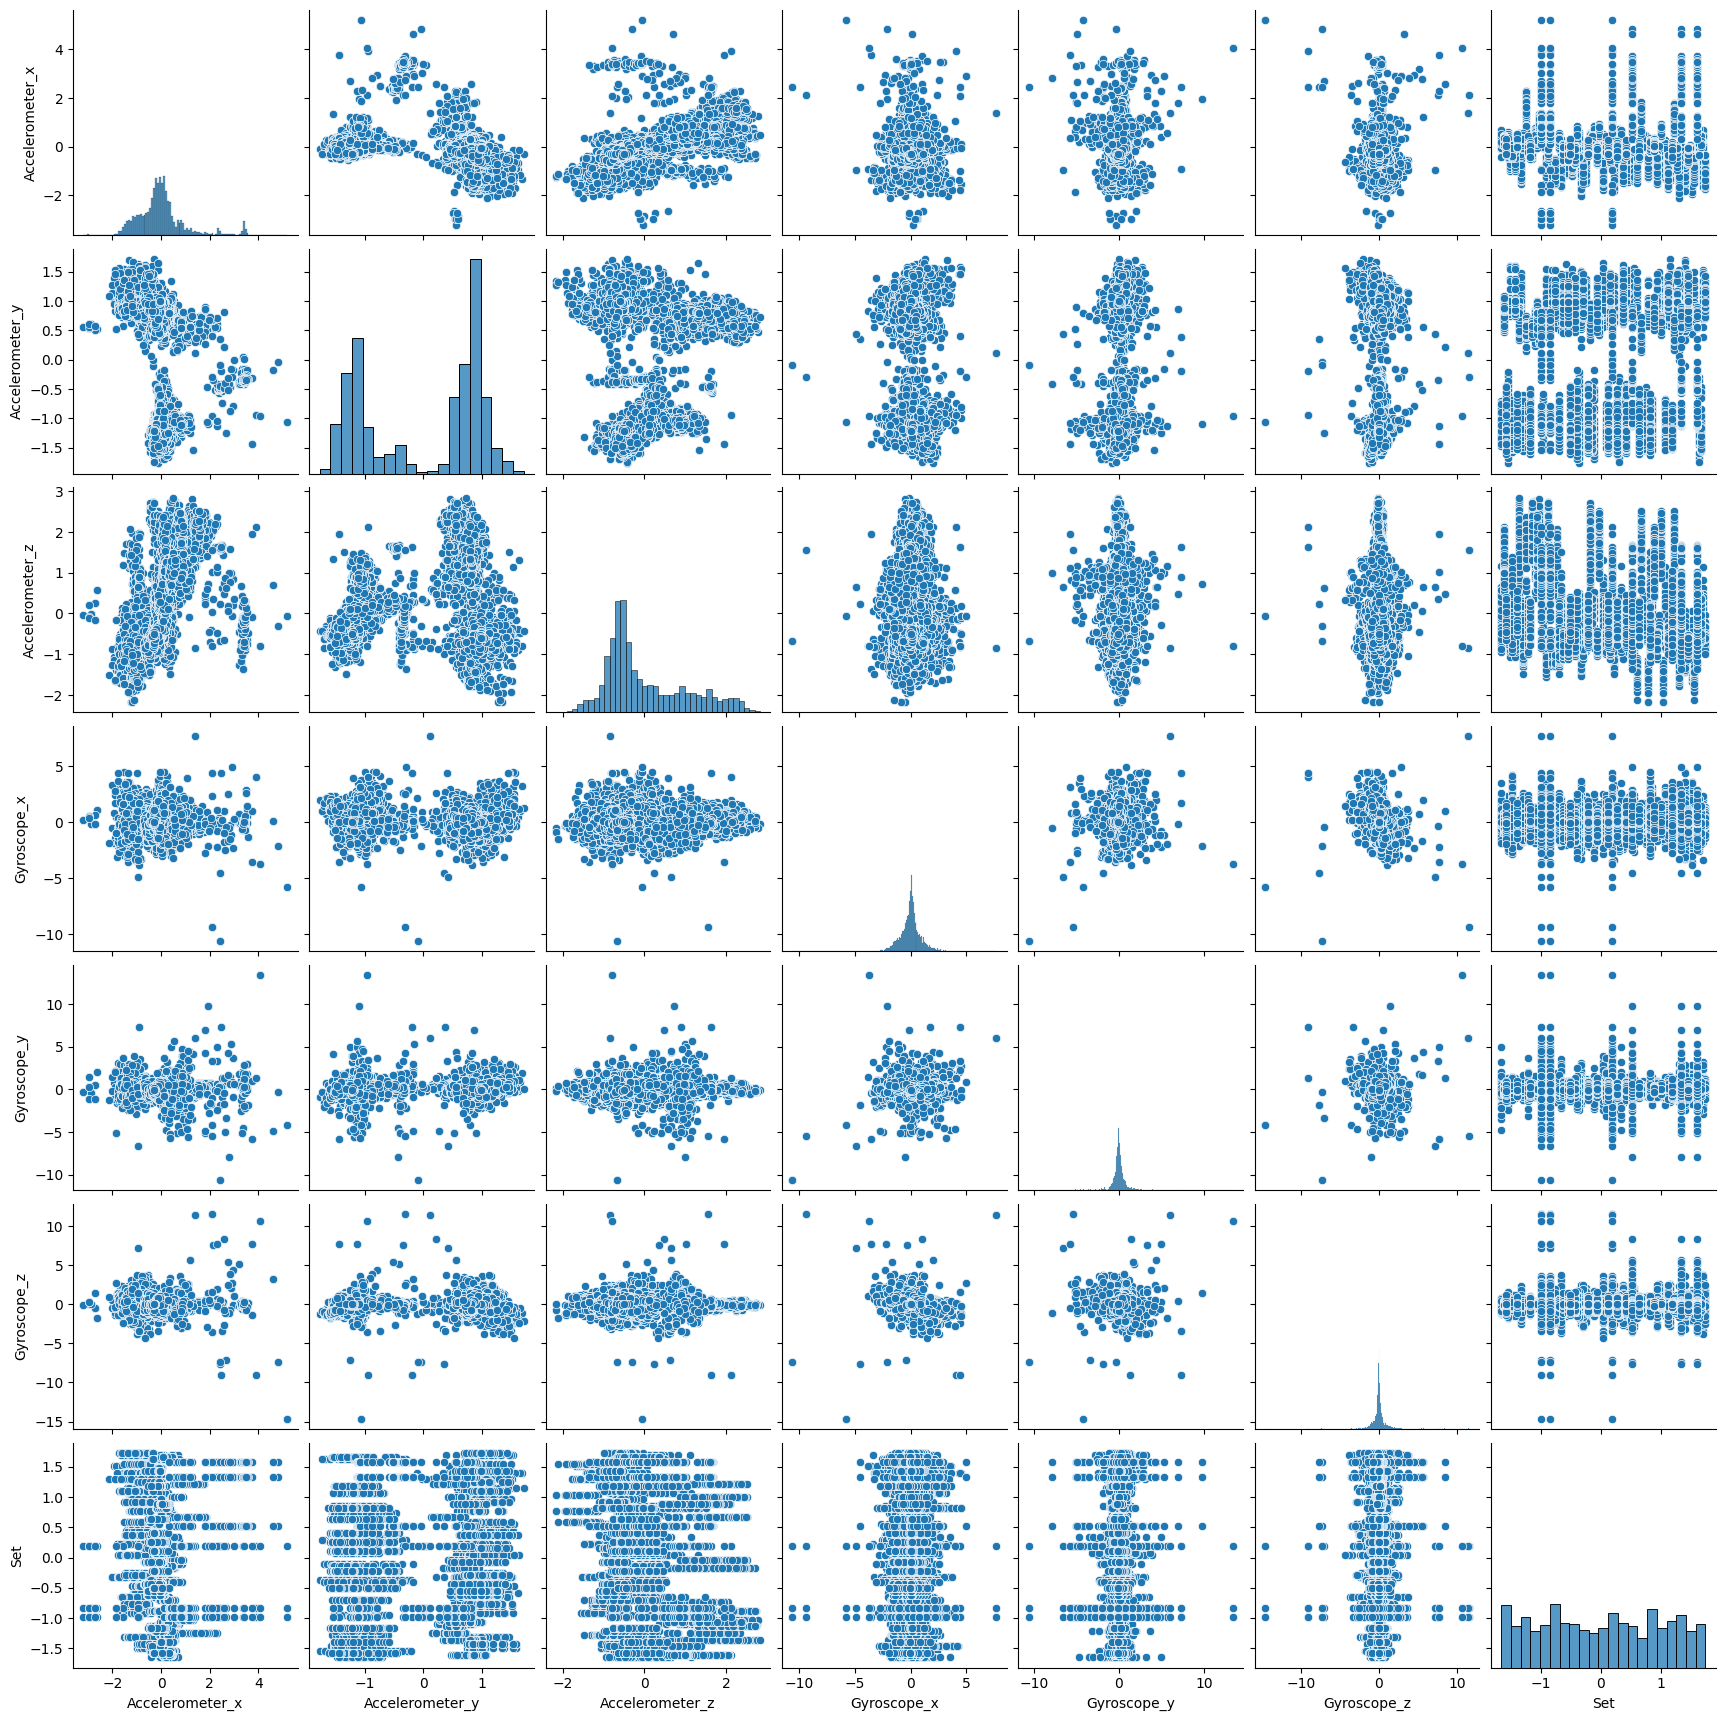

'sns.heatmap(data.corr(), annot=True, fmt=".2f")\nplt.show()'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

data_path = "/content/01_Data_Processed.csv"
data = pd.read_csv(data_path)

print("data:")
print(data.head())
data.info()
print(data.describe())
imputer = SimpleImputer(strategy='mean')

data_imputed = imputer.fit_transform(data.select_dtypes(include=[np.number]))
data[data.select_dtypes(include=[np.number]).columns] = data_imputed

scaler = StandardScaler()
data[data.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(data.select_dtypes(include=[np.number]))

sns.pairplot(data)
plt.show()

'''sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()'''

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import os
os.listdir('/content')

data_path = "/content/01_Data_Processed.csv"
data = pd.read_csv(data_path)
data = data.drop(columns= 'epoch (ms)')

dummies = pd.get_dummies(data[['Category' ,'Participants'] ], drop_first=False, dtype=int)
data = pd.concat([data, dummies], axis=1)

data = data.drop(columns=['Category' ,'Participants'])
if 'Label' in data.columns:

    le = LabelEncoder()
    data['Label'] = le.fit_transform(data['Label'])
    print(data['Label'].head())
else:
    print("not fouend")

data.fillna(data.median(), inplace=True)
data1 = data

y = data1['Label']
data = data.drop('Label', axis=1)
scaler = StandardScaler()

data = scaler.fit_transform(data)
X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("\nwait...")

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print()
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

extra_tree = ExtraTreeClassifier(random_state=0)
cls = BaggingClassifier(extra_tree, random_state=0).fit(
   X_train, y_train)
cls.score(X_test, y_test)

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

wait...


 97%|█████████▋| 31/32 [00:35<00:00,  1.69it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1649
[LightGBM] [Info] Number of data points in the train set: 8108, number of used features: 16
[LightGBM] [Info] Start training from score -1.693404
[LightGBM] [Info] Start training from score -1.765708
[LightGBM] [Info] Start training from score -1.690725
[LightGBM] [Info] Start training from score -2.081911
[LightGBM] [Info] Start training from score -1.854622
[LightGBM] [Info] Start training from score -1.717845
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

100%|██████████| 32/32 [00:36<00:00,  1.16s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f


ACCURACY OF THE MODEL: 0.9988901220865705


0.9988901220865705